<a href="https://colab.research.google.com/github/srikanth0904/machine-learning-/blob/main/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [8]:
df=pd.read_csv("student_data_synthetic_extreme_noisy.csv")

In [9]:
df.head()

,Marks 1,Marks 2,Admission
0,92.934283,79.481679,1
1,51.234714,56.298354,0
2,74.953771,53.461560,1
3,68.460597,50.233526,0
4,78.316933,83.619990,1


In [10]:
df.tail()

,Marks 1,Marks 2,Admission
45,67.603116,31.729701,1
46,20.787225,73.922406,0
47,83.142445,81.221105,1
48,81.872366,90.102269,1
49,19.739197,59.308257,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Marks 1    50 non-null     float64
 1   Marks 2    50 non-null     float64
 2   Admission  50 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


In [12]:
feature_cols=['Marks 1','Marks 2']
X=df[feature_cols]
y=df.Admission

In [9]:
class_counts=df.Admission.value_counts()
print(class_counts)

Admission
1    35
0    15
Name: count, dtype: int64


<Axes: xlabel='Marks 1', ylabel='Marks 2'>

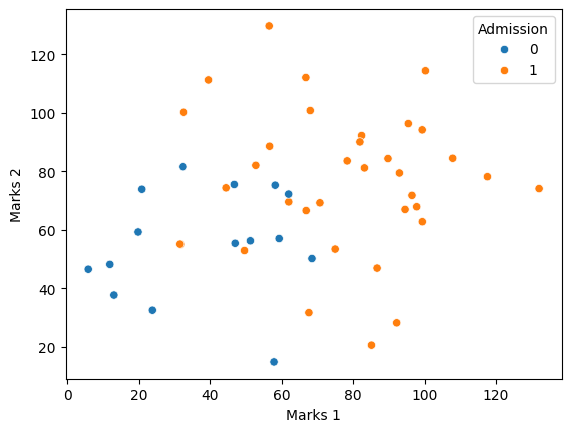

In [13]:
import seaborn as sns
sns.scatterplot(x=df['Marks 1'],y=df['Marks 2'],hue=df.Admission)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape
X_test.shape

(10, 2)

In [16]:
m1=LogisticRegression(class_weight='balanced',penalty='l2',solver='lbfgs',max_iter=1000)
m1.fit(X_train,y_train)
m1.score(X_test,y_test)

0.9

In [17]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(m1,X,y,cv=5)
scores
print("cross validation accuracy ",np.mean(scores))

cross validation accuracy  0.78


In [18]:
y_pred=m1.predict(X_test)
y_test
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [19]:
new_pred=m1.predict([[70,80]])
new_pred

array([1])

In [21]:
c1=metrics.confusion_matrix(y_pred,y_test)
c1

array([[0, 1],
       [0, 9]])

In [22]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))
print("precision",metrics.precision_score(y_test,y_pred))
print("recall",metrics.recall_score(y_test,y_pred))


accuracy 0.9
precision 1.0
recall 0.9
